# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Ideas - Analyze: 
1. Clean data: Check for missing value, null value, etc. 
2. Visualizing: using histograms, box plots for variables like purchase led time, and flight durations. 
3. Correlation analysis: identify relationships, answer questions: does longer purchase lead time increase booking completion?
4. Segment passengers: checking and group travelers based on their behaviors (solo or in group)

In [8]:
# 1. Clean data:
#check for missing value: 
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Conclusion: There is no missing data, or null value -> OK to continue

/var/folders/8l/3v0qcjcs3v53vjdw26w63wgr0000gn/T/ipykernel_10364/3740457870.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(grid=False, edgecolor = 'black', ax=ax)


array([[<Axes: title={'center': 'num_passengers'}>,
        <Axes: title={'center': 'purchase_lead'}>,
        <Axes: title={'center': 'length_of_stay'}>],
       [<Axes: title={'center': 'flight_hour'}>,
        <Axes: title={'center': 'flight_day'}>,
        <Axes: title={'center': 'wants_extra_baggage'}>],
       [<Axes: title={'center': 'wants_preferred_seat'}>,
        <Axes: title={'center': 'wants_in_flight_meals'}>,
        <Axes: title={'center': 'flight_duration'}>],
       [<Axes: title={'center': 'booking_complete'}>, <Axes: >, <Axes: >]],
      dtype=object)

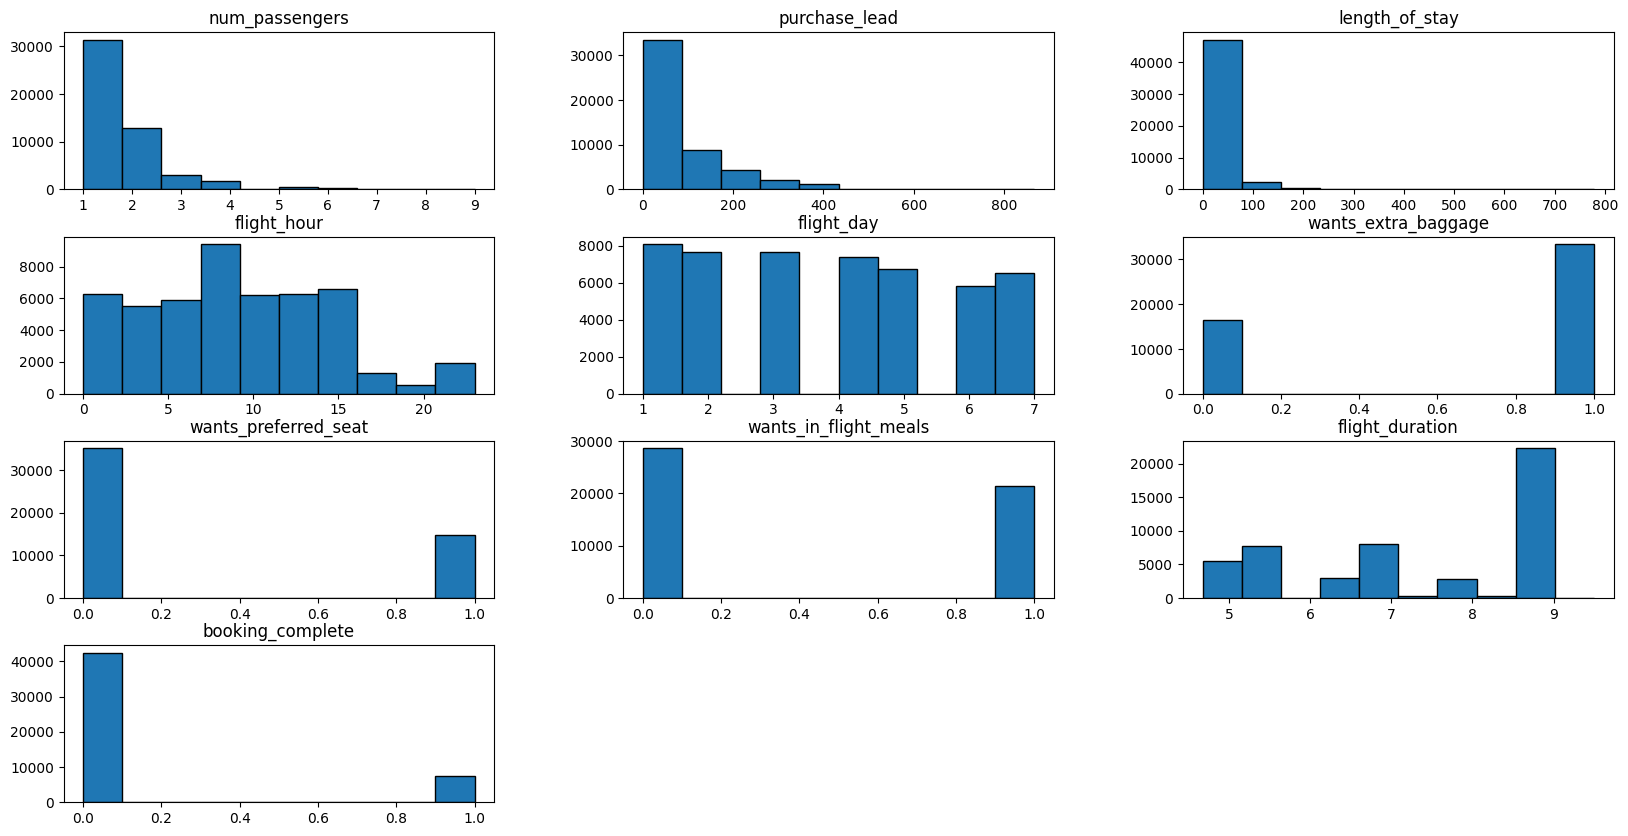

In [9]:
#2. Visualizing: 
#Plot histogram: Since I want to display the plot more beautifully

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

#create histogram using specified figure size
df.hist(grid=False, edgecolor = 'black', ax=ax)

A histogram: is a distribution of data. Using histograms when you have continuous measurements and want to understand the distribution of values and look for outliers. 

There are some models: 
- Unimodal distributions: has a single peak or mode
- Bimodal distribution: has 2 distinct peaks or modes



# Findings: 
- The number of customers who are solo travelers are larger than traveling in groups.
- The 7-9 am flight are the most often booked when comparing to others. -> Offer more flights depart between 7-9am. Or at noon.
- Usually, customers do not want preferred seat. -> Offer promotion for people to increase chance of buying seat.
- Usually, customers booking is not completed. (0 means False, 1 means True) -> Could be because of website feature, difficult to complete the booking? -> offer more user-friendly, easy to book feature.



In [10]:
# 3. Analyze the correlations: using df.corr() to find relationships between features

df.corr(numeric_only=True) #only include numeric values

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


A correlation matrix helps identify the relationships between features -> Measure of the linear association between 2 variables, has the value between -1 and 1. 
- -1: perfectly negative linear correlation between 2 variables. 
- 0: no linear correlation between 2 variables. 
- 1: perfectlt positive linear correlation between 2 variables. 

# Findings: 
- The longer the flight day, the lowest chance of booking complete -> Offer more and shorter flight day to increase the booking complete chance. 


In [11]:
#4. Segment passengers: 

df.groupby("num_passengers").mean(numeric_only=True)

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,,,,,,,,,
1,68.787797,26.054542,8.983701,3.785181,0.623501,0.279217,0.421121,7.334135,0.142096
2,105.661903,19.555373,9.200875,3.851375,0.721571,0.329428,0.423461,7.230318,0.160184
3,117.935736,15.901054,9.113567,3.870112,0.774906,0.326420,0.462428,7.120561,0.166950
4,136.809978,14.293722,9.307175,3.934417,0.816704,0.334641,0.485987,7.114496,0.154148
5,138.008913,12.818182,9.743316,4.019608,0.832442,0.319073,0.458111,7.135437,0.194296
6,129.332180,10.740484,8.885813,3.775087,0.816609,0.283737,0.467128,6.865052,0.186851
7,119.464912,9.228070,9.140351,3.833333,0.850877,0.236842,0.491228,6.574298,0.157895
8,117.337079,10.719101,9.056180,3.494382,0.730337,0.235955,0.359551,6.485730,0.134831
9,116.878788,6.257576,8.530303,3.636364,0.772727,0.151515,0.378788,6.268939,0.196970


# Findings: 
- Avg purchase_lead (time between booking and destination) of solo traveler is 68 days -> Solo travelers tend to book trip spontanuously, and has the flexible time. 
- Avg lenght of stay (time stay at the destination) of a couple are 19 days, more than when going in a group of 9 people (6 days) and less than time staying of a solo traveler (26 days) -> Offer group promotion? 

In [12]:
#5. Identify booking trend: investigate which days/flight have more completed bookings
df.groupby('flight_day')['booking_complete'].mean()

flight_day
1    0.148605
2    0.147139
3    0.163148
4    0.151131
5    0.145393
6    0.148142
7    0.141440
Name: booking_complete, dtype: float64

# Findings: 
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
- On the avg, people tend to book a plane ticket more often on Tuesday than on Sunday -> Have a little of booking secret gift for customers who book a flight a Sunday to increase the booking complete chance?

# Ideas - Tranform data: to create more predictive features.
1. Time-related feature: 
- Comvert flight_day into weekday vs. weekend
- Extract month or season from purchase lead time. 
2. Behavioral insights: 
- Compute: avg_lead_time_per_user (avg time a user books flights in advance)
- Compute: extra_features_sum (wants_extra_baggage + wants_preferred_seat + wants_in_flight_meals) to see if some travelers consistently opt for extras.
3. Categorization:
- Convert flight_hour into morning/afternoon/evening categories.
- Bin flight_duration into short-haul, medium-haul, and long-haul groups.


In [13]:
#1. Time-based feature: 
df["is_weekend"] = df["flight_day"].apply(lambda x: 1 if x in [6,7] else 0)
df.groupby("is_weekend")["booking_complete"].mean()
#0 is weekend, 1 is weekdays

is_weekend
0    0.151193
1    0.144590
Name: booking_complete, dtype: float64

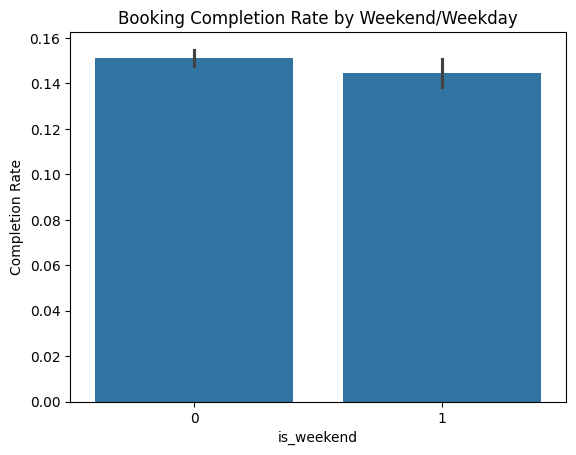

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

chart = sns.barplot(x=df["is_weekend"], y=df["booking_complete"])
plt.title("Booking Completion Rate by Weekend/Weekday")
plt.xlabel("is_weekend")
plt.ylabel("Completion Rate")
plt.show()

In [15]:
df["season"] = df["purchase_lead"].apply(lambda x: "Peak" if x > 120 else "Off-Peak")
df.groupby("season")["booking_complete"].mean()

season
Off-Peak    0.153415
Peak        0.137139
Name: booking_complete, dtype: float64

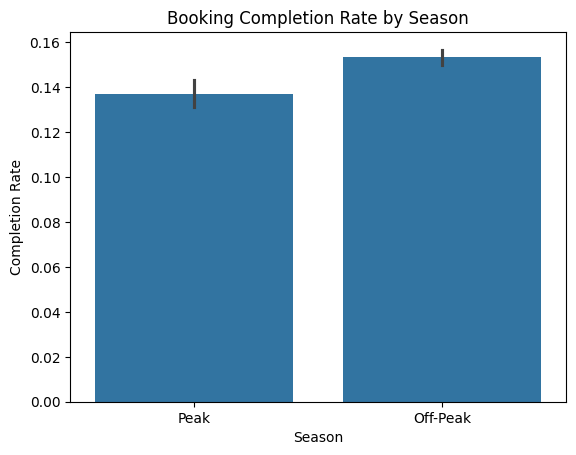

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df["season"], y=df["booking_complete"])
plt.title("Booking Completion Rate by Season")
plt.xlabel("Season")
plt.ylabel("Completion Rate")
plt.show()

In [17]:
#if late-night flights have different booking completion rates.
df["time_of_day"] = df["flight_hour"].apply(lambda x: "Morning" if x < 12 else "Afternoon" if x < 18 else "Night")
df.groupby("time_of_day")["booking_complete"].mean()


time_of_day
Afternoon    0.166703
Morning      0.145252
Night        0.118421
Name: booking_complete, dtype: float64

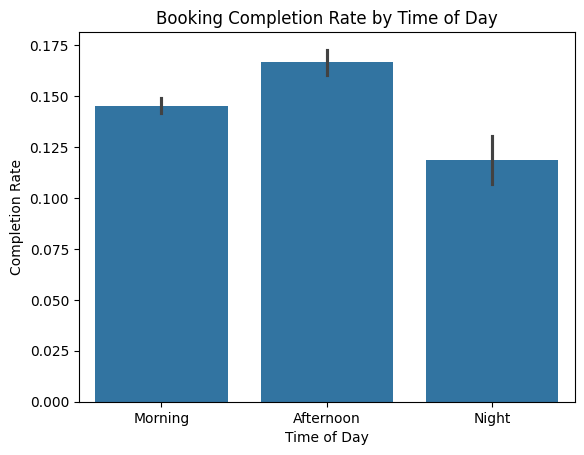

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df["time_of_day"], y=df["booking_complete"])
plt.title("Booking Completion Rate by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Completion Rate")
plt.show()


In [19]:
#Higher values suggest high-intent customers (more likely to complete bookings)
df["extras_purchased"] = df["wants_extra_baggage"] + df["wants_preferred_seat"] + df["wants_in_flight_meals"]
df.groupby("extras_purchased")["booking_complete"].mean()


extras_purchased
0    0.106743
1    0.149594
2    0.159726
3    0.185975
Name: booking_complete, dtype: float64

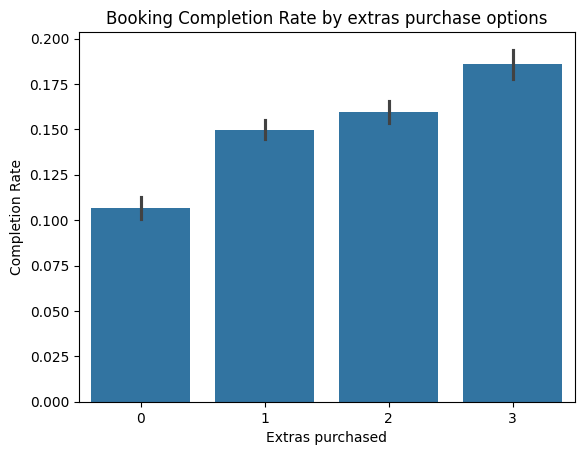

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df["extras_purchased"], y=df["booking_complete"])
plt.title("Booking Completion Rate by extras purchase options")
plt.xlabel("Extras purchased")
plt.ylabel("Completion Rate")
plt.show()


In [26]:
#investigate if the customers book a trip quicker or later than expected for a route
route_lead_avg = df.groupby("route")["purchase_lead"].mean()
df["route_lead_ratio"] = df["purchase_lead"] / df["route"].map(route_lead_avg)
df["route_lead_ratio"].head(10)

#df['route_lead_ratio] compares each passenger's purchase lead time againts the avg for their flight route

#Division (purchase_lead / route_lead_avg) creates a ratio:
#>1 → The passenger booked much earlier than usual for this route.
#<1 → The passenger booked later than the typical lead time.


0    1.509217
1    0.645161
2    1.399770
3    0.552995
4    0.391705
5    0.017281
6    1.157834
7    1.370968
8    0.460829
9    2.177419
Name: route_lead_ratio, dtype: float64

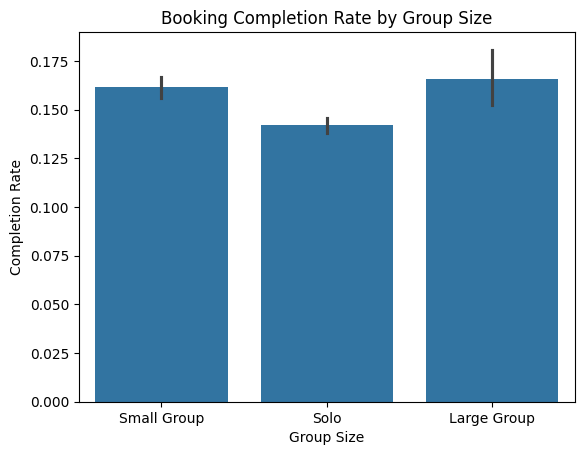

In [27]:
#Investigate the differrent group size habits
df["group_size_category"] = df["num_passengers"].apply(lambda x: "Solo" if x == 1 else "Small Group" if x < 4 else "Large Group")
df.groupby("group_size_category")["booking_complete"].mean()

sns.barplot(x=df["group_size_category"], y=df["booking_complete"])
plt.title("Booking Completion Rate by Group Size")
plt.xlabel("Group Size")
plt.ylabel("Completion Rate")
plt.show()


In [47]:
#convert trip type to numeric format for ML
df["trip_type_binary"] = df["trip_type"].map({"RoundTrip": 0, "OneWay": 1, "CircleTrip": 2})
print('Total number of Circle Trip:', df['trip_type'].value_counts().get('CircleTrip', 0))
print('Total number of Round Trip:', df['trip_type'].value_counts().get('RoundTrip', 0))
print('Total number of One Way Trip:', df['trip_type'].value_counts().get('OneWay', 0))

Total number of Circle Trip: 116
Total number of Round Trip: 49497
Total number of One Way Trip: 387


In [53]:
#4. Interaction Features:
# Investigate if short trips are often book last minutes

df["lead_stay_ratio"] = df["purchase_lead"] / (df["length_of_stay"] + 1)

df.groupby("lead_stay_ratio")["booking_complete"].mean()



lead_stay_ratio
0.000000      0.113514
0.002500      1.000000
0.002959      1.000000
0.004115      1.000000
0.004587      1.000000
                ...   
138.666667    0.000000
139.000000    0.000000
139.666667    0.000000
141.666667    0.000000
213.000000    0.000000
Name: booking_complete, Length: 8556, dtype: float64

Meanings:
---
Higher ratio (>1) → The traveler booked well in advance compared to their trip length (suggests careful planning).
Lower ratio (<1) → Booking was last-minute compared to the trip length (may indicate spontaneous or urgent travel).
Business vs. Leisure Travel → Short stays with high purchase lead times could indicate business travelers, while longer stays with late bookings may suggest leisure travelers.

In [52]:
# Helps see if longer flights encourage more add-ons.
df["preference_score"] = df["extras_purchased"] * df["flight_duration"]
df.groupby("preference_score")["booking_complete"].mean()


preference_score
0.00     0.106743
4.67     0.243986
4.72     0.231132
4.75     0.328395
4.83     0.108108
           ...   
24.45    0.017544
25.74    0.101110
26.01    0.305882
26.49    0.149166
28.50    0.000000
Name: booking_complete, Length: 63, dtype: float64


# Ideas - Prepare data for Modeling:
1. Preprocessing Data: 
- Ensuring the data is cleaned and ready for modeling. Steps: Handling missing values, encoding categorical variables (sales_channel, trip_type, route, and booking_origin, etc. into numerical representations)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical & numerical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
numerical_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Split data
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Choosing a model: 
- Considering booking_complete is a binary target (Y/N) or (0/1): 
    - Logistic Regression: Simple, interpretable, and effective.
    - Random forest: Greate for captureing complex rela.
    - XGBoost: Works well with structured data and handles missing values efficiently. 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.85
